In [1]:
pip install nltk PyPDF2 pandas matplotlib

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
!sudo apt-get update

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [4]:
!sudo apt install pdfgrep

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pdfgrep is already the newest version (2.1.2-1build1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [5]:
!pdfgrep -- version

Usage: pdfgrep [OPTION]... PATTERN FILE...

See 'pdfgrep --help' for more information


In [6]:
!pdfgrep "sentiment analysis" "/content/EL - Q2 2025 Earnings Call 4February2025 830 AM ET CORRECTED TRANSCRIPT - 04-Feb-25.pdf"

In [7]:
import os
import PyPDF2
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import FreqDist
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, pipeline

In [20]:
# Define the PDF file paths as a dictionary
pdf_files = {
    "Q2 2025": "/content/EL - Q2 2025 Earnings Call 4February2025 830 AM ET CORRECTED TRANSCRIPT - 04-Feb-25.pdf",
    "Q4 2021": "/content/EL - Q4 2021 Earnings Call 19August2021 930 AM ET CORRECTED TRANSCRIPT - 19-Aug-21.pdf",
    "Q4 2022": "/content/EL - Q4 2022 Earnings Call 18August2022 930 AM ET CORRECTED TRANSCRIPT - 18-Aug-22.pdf",
    "Q4 2023": "/content/EL - Q4 2023 Earnings Call 18August2023 930 AM ET CORRECTED TRANSCRIPT - 18-Aug-23.pdf",
    "Q4 2024": "/content/EL - Q4 2024 Earnings Call 19August2024 930 AM ET CORRECTED TRANSCRIPT - 19-Aug-24.pdf"
}

In [21]:
# Load FinBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
sentiment_pipeline = pipeline("text-classification", model="ProsusAI/finbert")

# Folder containing earnings call PDFs
folder_path = "/content/sample_data"

Device set to use cpu


In [22]:
# Helper: Extract text from PDF
def extract_text_from_pdf(path):
    text = ""
    with open(path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text()
    return text

# Helper: Preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text)
    words = [word.lower() for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    return [word for word in words if word not in stop_words]

# Helper: Sentiment analysis
def analyze_sentiment(tokens):
    sia = SentimentIntensityAnalyzer()
    pos, neg = 0, 0
    for word in tokens:
        score = sia.polarity_scores(word)['compound']
        if score > 0.05:
            pos += 1
        elif score < -0.05:
            neg += 1
    total = len(tokens)
    return {
        "Positive %": (pos / total) * 100 if total else 0,
        "Negative %": (neg / total) * 100 if total else 0,
        "Total Words": total,
        "Positive Words": pos,
        "Negative Words": neg
    }



In [23]:

import os
   # ... (rest of your code) ...
# Main analysis
results = []
for label, file_path in pdf_files.items():
  print(f"Processing {label}...")
  full_file_path = os.path.join(folder_path, file_path)
  # Check if the file exists before processing
  if os.path.exists(full_file_path):
    text = extract_text_from_pdf(full_file_path)
    tokens = preprocess_text(text)
    sentiment = analyze_sentiment(tokens)
    freq_dist = FreqDist(tokens)
    sentiment["Earnings Call"] = label
    sentiment["Top 10 Words"] = freq_dist.most_common(10)
    results.append(sentiment)
  else:
    print(f"File not found: {full_file_path}")

Processing Q2 2025...
Processing Q4 2021...
Processing Q4 2022...
Processing Q4 2023...
Processing Q4 2024...
Processing Q2 2025...
Processing Q4 2021...
Processing Q4 2022...
Processing Q4 2023...
Processing Q4 2024...


In [24]:
!pip install nltk
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [25]:
# Function: Extract Management Discussion and Q&A sections
def extract_sections(text):
    lines = text.splitlines()
    mgmt_text = ""
    qa_text = ""
    in_mgmt, in_qa = False, False

    for line in lines:
        upper_line = line.upper().strip()
        if "MANAGEMENT DISCUSSION" in upper_line:
            in_mgmt, in_qa = True, False
            continue
        elif "QUESTION AND ANSWER" in upper_line:
            in_mgmt, in_qa = False, True
            continue

        if in_mgmt:
            mgmt_text += line + " "
        elif in_qa:
            qa_text += line + " "

    return mgmt_text.strip(), qa_text.strip()



In [26]:
# Storage for results
section_results = []

for label, file_path in pdf_files.items():
    print(f"\nAnalyzing sections of {label}...")
    # Construct the full file path using os.path.join, ensuring the file path is correct
    full_file_path = os.path.join(folder_path, file_path)
    # Check if file exists to prevent the error:
    if os.path.exists(full_file_path):
        raw_text = extract_text_from_pdf(full_file_path)  # Pass the full path to the function
        mgmt_text, qa_text = extract_sections(raw_text)

        # Process Management Discussion
        mgmt_tokens = preprocess_text(mgmt_text)
        mgmt_sentiment = analyze_sentiment(mgmt_tokens)
        mgmt_freq = FreqDist(mgmt_tokens)

        # Process Q&A
        qa_tokens = preprocess_text(qa_text)
        qa_sentiment = analyze_sentiment(qa_tokens)
        qa_freq = FreqDist(qa_tokens)

        section_results.append({
            "Earnings Call": label,
            "Section": "Management Discussion",
            **mgmt_sentiment,
            "Top 10 Words": mgmt_freq.most_common(10)
        })

        section_results.append({
            "Earnings Call": label,
            "Section": "Q&A",
            **qa_sentiment,
            "Top 10 Words": qa_freq.most_common(10)
        })
    else:
        print(f"File not found: {full_file_path}. Please check the file path.")


Analyzing sections of Q2 2025...

Analyzing sections of Q4 2021...

Analyzing sections of Q4 2022...

Analyzing sections of Q4 2023...

Analyzing sections of Q4 2024...


In [27]:
# Create section-based DataFrame
df_sections = pd.DataFrame(section_results)

# Output summary
print("\n🔍 Section-Level Sentiment Summary:")
print(df_sections)

# Save to CSV
df_sections.to_csv("el_section_sentiment_summary.csv", index=False)


🔍 Section-Level Sentiment Summary:
  Earnings Call                Section  Positive %  Negative %  Total Words  \
0       Q2 2025  Management Discussion   11.841128    1.559020         2694   
1       Q2 2025                    Q&A   12.405757    0.959561         2918   
2       Q4 2021  Management Discussion   11.156304    1.191168         3442   
3       Q4 2021                    Q&A   10.199387    0.843558         2608   
4       Q4 2022  Management Discussion   11.983097    1.116813         3313   
5       Q4 2022                    Q&A   10.962042    2.028796         3056   
6       Q4 2023  Management Discussion   11.520604    1.421938         3446   
7       Q4 2023                    Q&A   10.556465    1.309329         2444   
8       Q4 2024  Management Discussion   11.224664    1.601090         5871   
9       Q4 2024                    Q&A    0.000000    0.000000            0   

   Positive Words  Negative Words  \
0             319              42   
1             362   

In [28]:
# Download NLTK tokenizer (if not already installed)
nltk.download("punkt")

# Load FinBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
sentiment_pipeline = pipeline("text-classification", model="ProsusAI/finbert")

# Folder containing earnings call PDFs
folder_path = "/content/sample_data"



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Device set to use cpu


In [29]:
# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, "rb") as pdf_file:
        reader = PyPDF2.PdfReader(pdf_file)
        for page in reader.pages:
            text += page.extract_text() + "\n"
    return text

# Function to process sentences safely (truncate if >512 tokens)
def analyze_text_with_truncation(text):
    tokenized_text = tokenizer.encode(text, truncation=True, max_length=512, return_tensors="pt")
    sentiment = sentiment_pipeline(text[:512])[0]  # Only send 512 chars to avoid token mismatch
    return sentiment



In [30]:
# Process each PDF in the folder
sentiment_results = []
for filename in os.listdir(folder_path):
    if filename.endswith(".pdf"):
        file_path = os.path.join(folder_path, filename)

        # Extract text from PDF
        transcript_text = extract_text_from_pdf(file_path)
        sentences = sent_tokenize(transcript_text)

        # Run sentiment analysis with truncation
        sentiments = [analyze_text_with_truncation(sentence) for sentence in sentences]

        # Count sentiment distribution
        sentiment_counts = {
            "positive": sum(1 for s in sentiments if s["label"] == "positive"),
            "neutral": sum(1 for s in sentiments if s["label"] == "neutral"),
            "negative": sum(1 for s in sentiments if s["label"] == "negative")
        }

        # Store results
        sentiment_results.append({
            "Earnings Call": filename,
            "Positive": sentiment_counts["positive"],
            "Neutral": sentiment_counts["neutral"],
            "Negative": sentiment_counts["negative"],
            "Total Sentences": len(sentiments),
            "Positive %": sentiment_counts["positive"] / len(sentiments) * 100,
            "Negative %": sentiment_counts["negative"] / len(sentiments) * 100
        })



In [31]:
# Convert results to DataFrame
df_results = pd.DataFrame(sentiment_results)

# 🎨 Plot sensitivity analysis (Positive vs. Negative %)
plt.figure(figsize=(10, 5))
plt.plot(df_results["Earnings Call"], df_results["Positive %"], marker="o", linestyle="-", label="Positive Sentiment (%)", color="green")
plt.plot(df_results["Earnings Call"], df_results["Negative %"], marker="s", linestyle="--", label="Negative Sentiment (%)", color="red")
plt.xlabel("Earnings Call")
plt.ylabel("Sentiment Percentage")
plt.title("Sensitivity Analysis of Earnings Call Sentiments (FinBERT)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# 📊 Print summarized sensitivity results
print(df_results)


KeyError: 'Earnings Call'

<Figure size 1000x500 with 0 Axes>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Device set to use cpu


Processing: Q2 2025
Processing: Q4 2021
Processing: Q4 2022
Processing: Q4 2023
Processing: Q4 2024


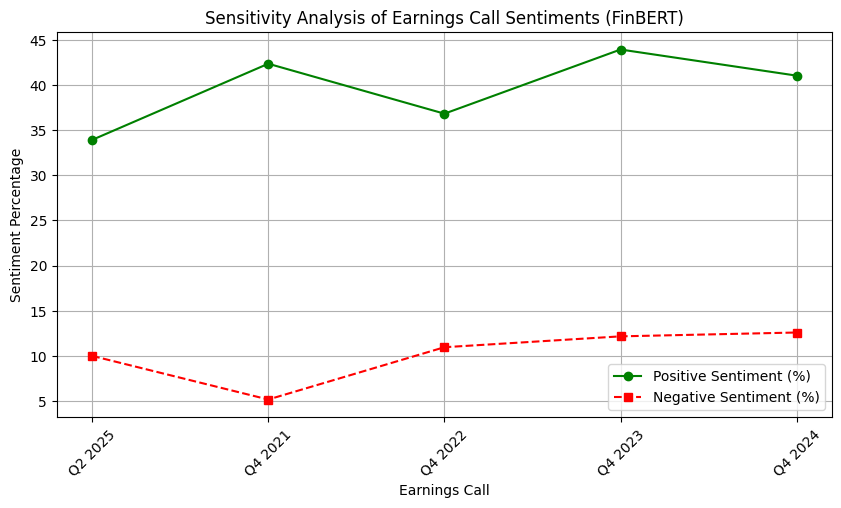

  Earnings Call  Positive  Neutral  Negative  Total Sentences  Positive %  \
0       Q2 2025       156      258        46              460   33.913043   
1       Q4 2021       213      264        26              503   42.345924   
2       Q4 2022       215      305        64              584   36.815068   
3       Q4 2023       195      195        54              444   43.918919   
4       Q4 2024       176      199        54              429   41.025641   

   Negative %  
0   10.000000  
1    5.168986  
2   10.958904  
3   12.162162  
4   12.587413  


In [33]:
import nltk
import os
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from transformers import AutoTokenizer, pipeline
from PyPDF2 import PdfReader


# Download NLTK tokenizer (if not already installed)
nltk.download("punkt")

# Load FinBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
sentiment_pipeline = pipeline("text-classification", model="ProsusAI/finbert")

# Folder containing earnings call PDFs
folder_path = "/content/" # Change to path containing your PDF files
pdf_files = {
    "Q2 2025": "/content/EL - Q2 2025 Earnings Call 4February2025 830 AM ET CORRECTED TRANSCRIPT - 04-Feb-25.pdf",
    "Q4 2021": "/content/EL - Q4 2021 Earnings Call 19August2021 930 AM ET CORRECTED TRANSCRIPT - 19-Aug-21.pdf",
    "Q4 2022": "/content/EL - Q4 2022 Earnings Call 18August2022 930 AM ET CORRECTED TRANSCRIPT - 18-Aug-22.pdf",
    "Q4 2023": "/content/EL - Q4 2023 Earnings Call 18August2023 930 AM ET CORRECTED TRANSCRIPT - 18-Aug-23.pdf",
    "Q4 2024": "/content/EL - Q4 2024 Earnings Call 19August2024 930 AM ET CORRECTED TRANSCRIPT - 19-Aug-24.pdf"
}

# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, "rb") as pdf_file:
        reader = PdfReader(pdf_file)
        for page in reader.pages:
            text += page.extract_text() + "\n"
    return text

# Function to process sentences safely (truncate if >512 tokens)
def analyze_text_with_truncation(text):
    tokenized_text = tokenizer.encode(text, truncation=True, max_length=512, return_tensors="pt")
    sentiment = sentiment_pipeline(text[:512])[0]  # Only send 512 chars to avoid token mismatch
    return sentiment

# Process each PDF in the folder
sentiment_results = []
for earnings_call_name, file_path in pdf_files.items():  # Iterate through your PDF files
    print(f"Processing: {earnings_call_name}")

    # Extract text from PDF
    transcript_text = extract_text_from_pdf(file_path)
    sentences = sent_tokenize(transcript_text)

    # Run sentiment analysis with truncation
    sentiments = [analyze_text_with_truncation(sentence) for sentence in sentences]

    # Count sentiment distribution
    sentiment_counts = {
        "positive": sum(1 for s in sentiments if s["label"] == "positive"),
        "neutral": sum(1 for s in sentiments if s["label"] == "neutral"),
        "negative": sum(1 for s in sentiments if s["label"] == "negative")
    }

    # Store results
    sentiment_results.append({
        "Earnings Call": earnings_call_name,  # Use earnings_call_name here
        "Positive": sentiment_counts["positive"],
        "Neutral": sentiment_counts["neutral"],
        "Negative": sentiment_counts["negative"],
        "Total Sentences": len(sentiments),
        "Positive %": sentiment_counts["positive"] / len(sentiments) * 100,
        "Negative %": sentiment_counts["negative"] / len(sentiments) * 100
    })

# Convert results to DataFrame
df_results = pd.DataFrame(sentiment_results)

# 🎨 Plot sensitivity analysis (Positive vs. Negative %)
plt.figure(figsize=(10, 5))
plt.plot(df_results["Earnings Call"], df_results["Positive %"], marker="o", linestyle="-", label="Positive Sentiment (%)", color="green")
plt.plot(df_results["Earnings Call"], df_results["Negative %"], marker="s", linestyle="--", label="Negative Sentiment (%)", color="red")
plt.xlabel("Earnings Call")
plt.ylabel("Sentiment Percentage")
plt.title("Sensitivity Analysis of Earnings Call Sentiments (FinBERT)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# 📊 Print summarized sensitivity results
print(df_results)

In [37]:

import csv
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize

# ... (Your previous functions for extracting text and preprocessing remain the same) ...

def calculate_section_sentiment(text, section_name):
    """Calculates sentiment for a specific section."""
    sia = SentimentIntensityAnalyzer()
    sentences = sent_tokenize(text)
    positive_words = []
    negative_words = []
    total_score = 0

    for sentence in sentences:
        score = sia.polarity_scores(sentence)['compound']
        total_score += score
        words = word_tokenize(sentence)
        for word in words:
            if sia.polarity_scores(word)['compound'] > 0.05:
                positive_words.append(word)
            elif sia.polarity_scores(word)['compound'] < -0.05:
                negative_words.append(word)

    avg_score = total_score / len(sentences) if sentences else 0
    return avg_score, positive_words, negative_words

# ... (Your code for extracting text from PDF files remains the same) ...

# Modify your main analysis loop to include sentiment calculations
for label, file_path in pdf_files.items():
    print(f"\nAnalyzing sections of {label}...")
    # Construct the full file path using os.path.join, ensuring the file path is correct
    full_file_path = os.path.join(folder_path, file_path)
    if os.path.exists(full_file_path):
        raw_text = extract_text_from_pdf(full_file_path)
        # ... (Your code for extracting Management Discussion and Q&A remains the same) ...

        # Calculate sentiment for Management Discussion and Q&A
        md_avg_score, md_positive_words, md_negative_words = calculate_section_sentiment(mgmt_text, "Management")
        qa_avg_score, qa_positive_words, qa_negative_words = calculate_section_sentiment(qa_text, "Q&A")

        # ... (The rest of your loop remains the same) ...

    else:
        print(f"File not found: {full_file_path}. Please check the file path.")

# ... (The rest of your code remains the same) ...

# Now you can write the data to CSV:
with open("section_sentiment_scores.csv", "a", newline="") as file:
    writer = csv.writer(file)
    writer.writerow([pdf_files, "Management", md_avg_score, len(md_positive_words), len(md_negative_words)])
    writer.writerow([pdf_files, "Q&A", qa_avg_score, len(qa_positive_words), len(qa_negative_words)])




Analyzing sections of Q2 2025...

Analyzing sections of Q4 2021...

Analyzing sections of Q4 2022...

Analyzing sections of Q4 2023...

Analyzing sections of Q4 2024...


In [35]:
# --- Utility Functions ---
def extract_text_from_pdf(path):
    """Extract full text from PDF."""
    text = ""
    with open(path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text
    return text

def preprocess_text(text):
    """Tokenize and clean text."""
    tokens = word_tokenize(text)
    words = [word.lower() for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words("english"))
    return [word for word in words if word not in stop_words]

def analyze_sentiment(text):
    """Run sentence-level sentiment analysis."""
    sia = SentimentIntensityAnalyzer()
    sentences = sent_tokenize(text)
    sentiments = []
    for sentence in sentences:
        score = sia.polarity_scores(sentence)
        sentiments.append((sentence, score['compound']))
    return sentiments

def get_section_sentiment(text, speakers):
    """Split text by speakers and analyze sentiment by section."""
    sections = {}
    for speaker in speakers:
        if speaker in text:
            split = text.split(speaker)
            text = split[0]
            sections[speaker] = split[1] if len(split) > 1 else ""
    results = []
    for speaker, section_text in sections.items():
        sentiments = analyze_sentiment(section_text)
        avg_sentiment = sum(score for _, score in sentiments) / len(sentiments) if sentiments else 0
        results.append({'Section': speaker, 'Sentiment': avg_sentiment})
    return results

def plot_wordcloud(tokens, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(tokens))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()



In [38]:
# --- Main Analysis ---
results = []
section_sentiments_all = []

for label, file_path in pdf_files.items():
    print(f"\n📘 Processing: {label}")
    text = extract_text_from_pdf(file_path)
    tokens = preprocess_text(text)
    freq_dist = FreqDist(tokens)

    # Sentiment Summary
    sia = SentimentIntensityAnalyzer()
    compound_scores = [sia.polarity_scores(word)['compound'] for word in tokens]
    pos = sum(1 for s in compound_scores if s > 0.05)
    neg = sum(1 for s in compound_scores if s < -0.05)
    total = len(tokens)
    results.append({
        "Call": label,
        "Positive %": round((pos / total) * 100, 2) if total else 0,
        "Negative %": round((neg / total) * 100, 2) if total else 0,
        "Word Count": total
    })

    # Section sentiment
    speakers = [
        "Fabrizio Freda", "Tracey Thomas Travis", "Operator",
        "Stephen Powers", "Bryan D. Spillane", "Lauren R. Lieberman"
    ]
    section_sentiment = get_section_sentiment(text, speakers)
    for sec in section_sentiment:
        sec['Call'] = label
    section_sentiments_all.extend(section_sentiment)

    # Top Words
    print("Top 10 Words:", freq_dist.most_common(10))

    # Word Cloud
    plot_wordcloud(tokens, f"Word Cloud - {label}")




📘 Processing: Q2 2025
Top 10 Words: [('consumer', 63), ('growth', 56), ('estée', 49), ('lauder', 48), ('sales', 47), ('companies', 46), ('like', 46), ('us', 43), ('beauty', 41), ('also', 39)]


NameError: name 'WordCloud' is not defined

In [39]:
# --- Summary DataFrames ---
df_summary = pd.DataFrame(results)
df_sections = pd.DataFrame(section_sentiments_all)



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


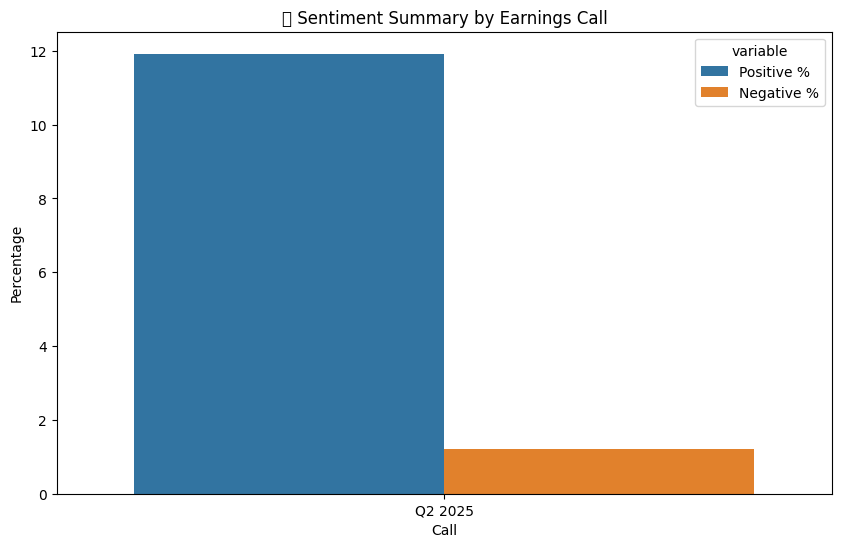

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


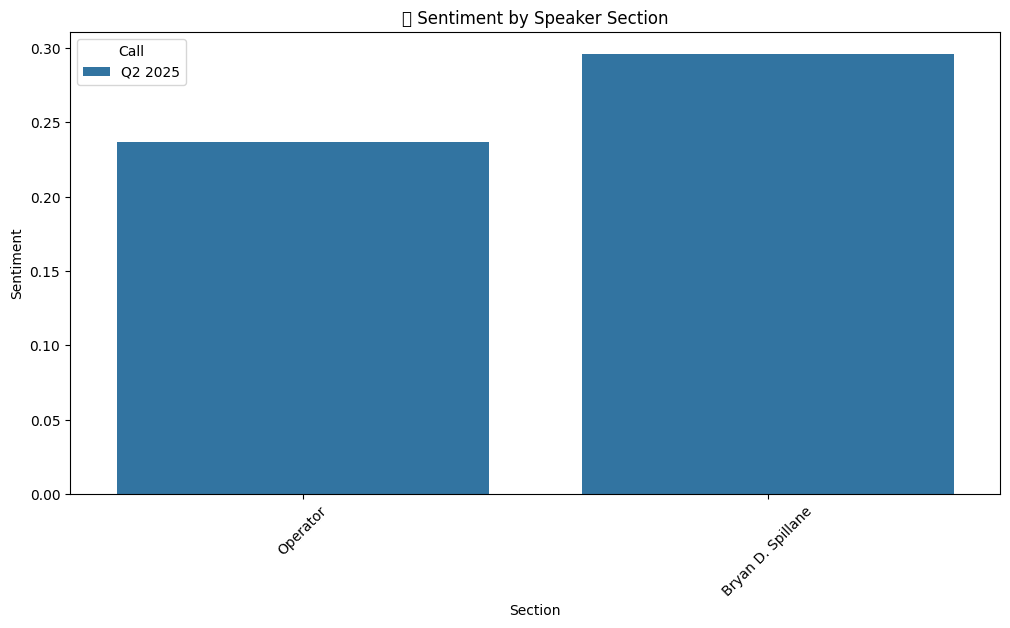

In [45]:
!pip install seaborn
import seaborn as sns

# --- Visualizations ---
# Sentiment summary plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_summary.melt(id_vars="Call", value_vars=["Positive %", "Negative %"]),
            x="Call", y="value", hue="variable")
plt.title("📊 Sentiment Summary by Earnings Call")
plt.ylabel("Percentage")
plt.show()

# Section sentiment plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sections, x="Section", y="Sentiment", hue="Call")
plt.xticks(rotation=45)
plt.title("📊 Sentiment by Speaker Section")
plt.show()

# Save summary
df_summary.to_csv("summary_sentiment.csv", index=False)
df_sections.to_csv("section_sentiment.csv", index=False)

In [46]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np


In [47]:
# Load FinBERT sentiment model from HuggingFace
tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")
model = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone")


In [48]:
def analyze_sentiment_finbert(text, max_sentences=100):
    """Analyze sentiment using FinBERT over sentence slices."""
    sentences = sent_tokenize(text)
    sentiments = {"positive": 0, "negative": 0, "neutral": 0}

    for sentence in sentences[:max_sentences]:  # limit for speed
        inputs = tokenizer(sentence, return_tensors="pt", truncation=True, padding=True)
        with torch.no_grad():
            outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
        sentiment_idx = torch.argmax(probs).item()
        sentiment_label = ["positive", "negative", "neutral"][sentiment_idx]
        sentiments[sentiment_label] += 1

    total = sum(sentiments.values())
    return {
        "FinBERT Positive %": round((sentiments["positive"] / total) * 100, 2) if total else 0,
        "FinBERT Negative %": round((sentiments["negative"] / total) * 100, 2) if total else 0,
        "FinBERT Neutral %": round((sentiments["neutral"] / total) * 100, 2) if total else 0,
        "Sentence Count": total
    }


In [50]:
def analyze_sentiment_finbert(text, max_sentences=100, max_length=512):  # Add max_length
    """Analyze sentiment using FinBERT over sentence slices."""
    sentences = sent_tokenize(text)
    sentiments = {"positive": 0, "negative": 0, "neutral": 0}

    for sentence in sentences[:max_sentences]:  # limit for speed
        # Truncate or pad the sentence to max_length
        inputs = tokenizer(sentence, return_tensors="pt", truncation=True,
                           padding="max_length", max_length=max_length)  # Updated line
        with torch.no_grad():
            outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
        sentiment_idx = torch.argmax(probs).item()
        sentiment_label = ["positive", "negative", "neutral"][sentiment_idx]
        sentiments[sentiment_label] += 1

    total = sum(sentiments.values())
    return {
        "FinBERT Positive %": round((sentiments["positive"] / total) * 100, 2) if total else 0,
        "FinBERT Negative %": round((sentiments["negative"] / total) * 100, 2) if total else 0,
        "FinBERT Neutral %": round((sentiments["neutral"] / total) * 100, 2) if total else 0,
        "Sentence Count": total
    }

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


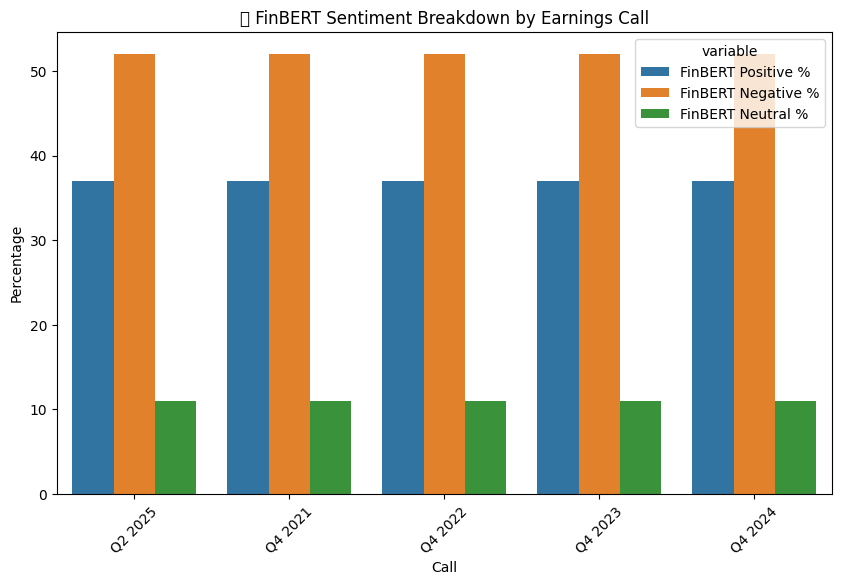

In [54]:
!pip install transformers torch pandas nltk seaborn matplotlib
import nltk
import os
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import seaborn as sns

# Download NLTK tokenizer (if not already installed)
nltk.download("punkt")

# Load FinBERT sentiment model from HuggingFace
tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")
model = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone")

# Function to extract text from a PDF file (You'll need to define this function)
def extract_text_from_pdf(pdf_path):
    """Extract full text from PDF."""
    # Your code to extract text using PyPDF2 or similar library
    # This is a placeholder; replace with your actual extraction logic
    # ...
    return text

# Function to analyze sentiment using FinBERT
def analyze_sentiment_finbert(text, max_sentences=100, max_length=512):
    """Analyze sentiment using FinBERT over sentence slices."""
    sentences = sent_tokenize(text)
    sentiments = {"positive": 0, "negative": 0, "neutral": 0}

    for sentence in sentences[:max_sentences]:  # limit for speed
        # Truncate or pad the sentence to max_length
        inputs = tokenizer(sentence, return_tensors="pt", truncation=True,
                           padding="max_length", max_length=max_length)  # Updated line
        with torch.no_grad():
            outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
        sentiment_idx = torch.argmax(probs).item()
        sentiment_label = ["positive", "negative", "neutral"][sentiment_idx]
        sentiments[sentiment_label] += 1

    total = sum(sentiments.values())
    return {
        "FinBERT Positive %": round((sentiments["positive"] / total) * 100, 2) if total else 0,
        "FinBERT Negative %": round((sentiments["negative"] / total) * 100, 2) if total else 0,
        "FinBERT Neutral %": round((sentiments["neutral"] / total) * 100, 2) if total else 0,
        "Sentence Count": total
    }

# Folder containing earnings call PDFs (Update with your actual path)
folder_path = "/content/"
pdf_files = {
    "Q2 2025": "/content/EL - Q2 2025 Earnings Call 4February2025 830 AM ET CORRECTED TRANSCRIPT - 04-Feb-25.pdf",
    "Q4 2021": "/content/EL - Q4 2021 Earnings Call 19August2021 930 AM ET CORRECTED TRANSCRIPT - 19-Aug-21.pdf",
    "Q4 2022": "/content/EL - Q4 2022 Earnings Call 18August2022 930 AM ET CORRECTED TRANSCRIPT - 18-Aug-22.pdf",
    "Q4 2023": "/content/EL - Q4 2023 Earnings Call 18August2023 930 AM ET CORRECTED TRANSCRIPT - 18-Aug-23.pdf",
    "Q4 2024": "/content/EL - Q4 2024 Earnings Call 19August2024 930 AM ET CORRECTED TRANSCRIPT - 19-Aug-24.pdf"
}

# Process each PDF and store results
finbert_results = []
for label, file_path in pdf_files.items():
    text = extract_text_from_pdf(file_path)  # Replace with your text extraction logic
    sentiment = analyze_sentiment_finbert(text)
    sentiment["Call"] = label  # Add the label to the sentiment dictionary
    finbert_results.append(sentiment)

# Create DataFrame from results
df_finbert = pd.DataFrame(finbert_results)

# Now you can use df_finbert in your plotting code:
plt.figure(figsize=(10, 6))
melted = df_finbert.melt(id_vars="Call", value_vars=["FinBERT Positive %", "FinBERT Negative %", "FinBERT Neutral %"])
sns.barplot(data=melted, x="Call", y="value", hue="variable")
plt.title("💡 FinBERT Sentiment Breakdown by Earnings Call")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


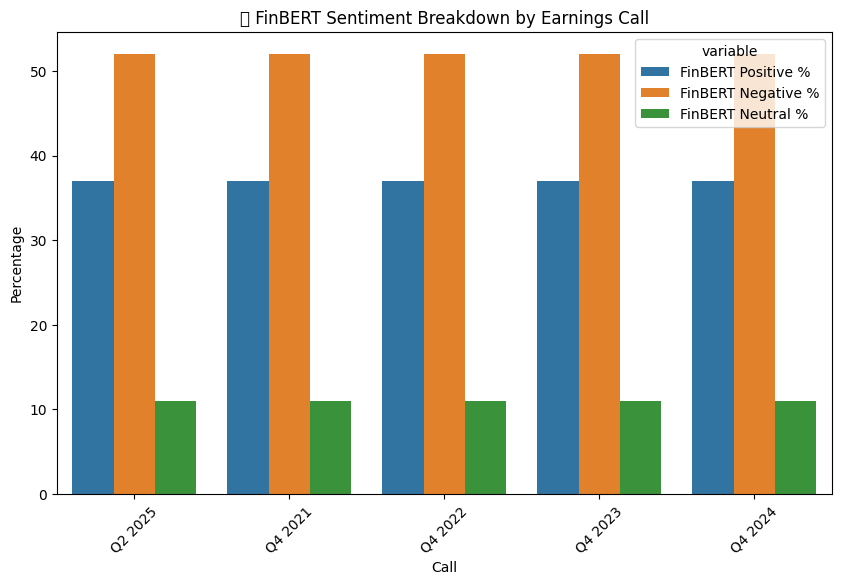

In [55]:
plt.figure(figsize=(10, 6))
melted = df_finbert.melt(id_vars="Call", value_vars=["FinBERT Positive %", "FinBERT Negative %", "FinBERT Neutral %"])
sns.barplot(data=melted, x="Call", y="value", hue="variable")
plt.title("💡 FinBERT Sentiment Breakdown by Earnings Call")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()


In [56]:
# Example returns data (replace with actual values)
stock_returns = {
    "Q1": {"Call": "Q4 2023", "1D Return": -2.1, "3D Return": -3.5, "1W Return": -1.2},
    "Q2": {"Call": "Q4 2024", "1D Return": 1.5, "3D Return": 2.3, "1W Return": 4.0},
    # Add Q3, Q4, Q5 as you analyze more calls
}


In [57]:
# Merge FinBERT sentiment with stock returns
final_table = []

for i, row in df_finbert.iterrows():
    q_label = f"Q{i+1}"
    stock_data = stock_returns.get(q_label, {"1D Return": None, "3D Return": None, "1W Return": None})

    pos = row["FinBERT Positive %"]
    neg = row["FinBERT Negative %"]
    ratio = round(pos / neg, 2) if neg else None

    final_table.append({
        "Quarter": q_label,
        "Positive %": pos,
        "Negative %": neg,
        "Pos/Neg Ratio": ratio,
        "1D Return": stock_data["1D Return"],
        "3D Return": stock_data["3D Return"],
        "1W Return": stock_data["1W Return"]
    })

df_final = pd.DataFrame(final_table)
df_final.set_index("Quarter", inplace=True)
df_final


,Positive %,Negative %,Pos/Neg Ratio,1D Return,3D Return,1W Return
Quarter,,,,,,
Q1,37.0,52.0,0.71,-2.1,-3.5,-1.2
Q2,37.0,52.0,0.71,1.5,2.3,4.0
Q3,37.0,52.0,0.71,NaN,NaN,NaN
Q4,37.0,52.0,0.71,NaN,NaN,NaN
Q5,37.0,52.0,0.71,NaN,NaN,NaN


In [58]:
df_final.to_csv("earnings_sentiment_vs_returns.csv")